# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    city = f'{city}, {country}' 
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Create DataFrame
# Citipy Cities
cities_weather = pd.DataFrame({
    'City': cities}, columns=['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date'])

# Create other datafram columnns
#cities_weather["Lat"] = 0
#cities_weather["Lng"] = 0
#cities_weather["Max Temp"] = 0
#cities_weather["Humidity"] = 0
#cities_weather["Cloudiness"] = 0
#cities_weather["Wind Speed"] = 0
#cities_weather["Country"] = ""
#cities_weather["Date"] = ""

# Keep track of record and set counter information
currentSet = 0
currentRecord = 0
currentCity = "aCity"

#Loop through city list
for index, row in cities_weather.iterrows():
    try:
        currentCity = cities_weather.loc[index,"City"]
        query_url = f'{url}appid={weather_api_key}&q={currentCity}&units={units}'
        response = requests.get(query_url).json()

        cities_weather.loc[index, "Lat"] = response["coord"]["lat"]
        cities_weather.loc[index, "Lng"] = response["coord"]["lon"]
        cities_weather.loc[index, "Max Temp"] = response["main"]["temp_max"]
        cities_weather.loc[index, "Humidity"] = response["main"]["humidity"]
        cities_weather.loc[index, "Cloudiness"] = response["clouds"]["all"]
        cities_weather.loc[index, "Wind Speed"] = response["wind"]["speed"]
        cities_weather.loc[index, "Country"] = response["sys"]["country"]
        cities_weather.loc[index, "Date"] = response["dt"]
        print(f"Processing Record {currentRecord} of Set {currentSet} | {currentCity}")
        #print(query_url)
        
        #temp = response["main"]["temp_max"]
        #lat = response["coord"]["lat"]
        #lon = response["coord"]["lon"]
        #print(temp)
        #print(lat)
        #print(lon)
    except:
        print("City not found. Skipping...")
            
    if currentRecord < 50:
        currentRecord += 1
    else:
        currentSet += 1
        currentRecord = 0

#cities_weather

City not found. Skipping...
Processing Record 1 of Set 0 | albany, au
Processing Record 2 of Set 0 | santa ines, br
Processing Record 3 of Set 0 | santa isabel, mx
City not found. Skipping...
City not found. Skipping...
Processing Record 6 of Set 0 | lompoc, us
Processing Record 7 of Set 0 | bluff, nz
Processing Record 8 of Set 0 | clyde river, ca
Processing Record 9 of Set 0 | iqaluit, ca
Processing Record 10 of Set 0 | ancud, cl
Processing Record 11 of Set 0 | hermanus, za
Processing Record 12 of Set 0 | yushan, cn
Processing Record 13 of Set 0 | hilo, us
Processing Record 14 of Set 0 | los llanos de aridane, es
City not found. Skipping...
Processing Record 16 of Set 0 | port blair, in
Processing Record 17 of Set 0 | rikitea, pf
Processing Record 18 of Set 0 | punta arenas, cl
City not found. Skipping...
Processing Record 20 of Set 0 | kalga, ru
Processing Record 21 of Set 0 | aklavik, ca
Processing Record 22 of Set 0 | leningradskiy, ru
Processing Record 23 of Set 0 | jamestown, sh


Processing Record 37 of Set 3 | solnechnyy, ru
Processing Record 38 of Set 3 | praia da vitoria, pt
Processing Record 39 of Set 3 | molochnoye, ru
Processing Record 40 of Set 3 | southbridge, nz
Processing Record 41 of Set 3 | ostrovnoy, ru
Processing Record 42 of Set 3 | armidale, au
Processing Record 43 of Set 3 | quatre cocos, mu
Processing Record 44 of Set 3 | butaritari, ki
Processing Record 45 of Set 3 | roma, au
Processing Record 46 of Set 3 | andenes, no
Processing Record 47 of Set 3 | encruzilhada do sul, br
Processing Record 48 of Set 3 | bridlington, gb
City not found. Skipping...
Processing Record 50 of Set 3 | kahului, us
Processing Record 0 of Set 4 | porto novo, cv
Processing Record 1 of Set 4 | alice springs, au
Processing Record 2 of Set 4 | karlskoga, se
Processing Record 3 of Set 4 | traunstein, de
Processing Record 4 of Set 4 | waraseoni, in
City not found. Skipping...
Processing Record 6 of Set 4 | severo-kurilsk, ru
Processing Record 7 of Set 4 | matagami, ca
Proc

Processing Record 21 of Set 7 | qasigiannguit, gl
Processing Record 22 of Set 7 | geraldton, au
Processing Record 23 of Set 7 | sobotin, cz
Processing Record 24 of Set 7 | rantepao, id
Processing Record 25 of Set 7 | ullapool, gb
Processing Record 26 of Set 7 | ouesso, cg
Processing Record 27 of Set 7 | oyama, jp
Processing Record 28 of Set 7 | port lincoln, au
Processing Record 29 of Set 7 | rawson, ar
Processing Record 30 of Set 7 | guerrero negro, mx
Processing Record 31 of Set 7 | laizhou, cn
City not found. Skipping...
Processing Record 33 of Set 7 | taltal, cl
Processing Record 34 of Set 7 | grand gaube, mu
Processing Record 35 of Set 7 | carutapera, br
Processing Record 36 of Set 7 | margate, za
Processing Record 37 of Set 7 | ust-ilimsk, ru
Processing Record 38 of Set 7 | hanyang, cn
Processing Record 39 of Set 7 | dalbandin, pk
Processing Record 40 of Set 7 | shar, kz
Processing Record 41 of Set 7 | awbari, ly
Processing Record 42 of Set 7 | northam, au
Processing Record 43 of

City not found. Skipping...
Processing Record 6 of Set 11 | dieppe, fr
City not found. Skipping...
Processing Record 8 of Set 11 | port hawkesbury, ca
Processing Record 9 of Set 11 | itea, gr
Processing Record 10 of Set 11 | labuan, my
Processing Record 11 of Set 11 | maniitsoq, gl
Processing Record 12 of Set 11 | sangmelima, cm
Processing Record 13 of Set 11 | prattville, us
Processing Record 14 of Set 11 | shilka, ru
Processing Record 15 of Set 11 | villa rica, pe
Processing Record 16 of Set 11 | bhiwani, in
Processing Record 17 of Set 11 | tura, ru
Processing Record 18 of Set 11 | krapivinskiy, ru
Processing Record 19 of Set 11 | gladstone, au
Processing Record 20 of Set 11 | liuzhou, cn
City not found. Skipping...
Processing Record 22 of Set 11 | tulum, mx
Processing Record 23 of Set 11 | timizart, dz
Processing Record 24 of Set 11 | marystown, ca
Processing Record 25 of Set 11 | loksa, ee
Processing Record 26 of Set 11 | neiafu, to
Processing Record 27 of Set 11 | mudgee, au
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Save Data to csv
cities_weather.to_csv("Resources/Sample_Weather_Data.csv", encoding="utf-8", index=False)
# Display DataFrame
cities_weather

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,"vila, vu",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"albany, au",-35.0169,117.892,75.2,57,75,19.57,AU,1612160050
2,"santa ines, br",-3.6667,-45.38,73.69,98,94,1.77,BR,1612160051
3,"santa isabel, mx",28.3833,-113.35,55.4,38,100,7.38,MX,1612160051
4,"taolanaro, mg",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
614,"namatanai, pg",-3.6667,152.433,82.81,79,71,8.72,PG,1612160332
615,"dabat, et",12.9842,37.765,60.19,39,0,7.81,ET,1612160332
616,"almazar, uz",40.3217,69.0106,50,57,20,13.42,UZ,1612160332
617,"cockburn town, tc",21.4612,-71.1419,76.05,77,66,22.01,TC,1612160333


In [5]:
summary_df = cities_weather[['Lat','Lng','Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date']]
summary_df2 = summary_df.dropna(how='all')
summary_df2

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
1,-35.0169,117.892,75.2,57,75,19.57,1612160050
2,-3.6667,-45.38,73.69,98,94,1.77,1612160051
3,28.3833,-113.35,55.4,38,100,7.38,1612160051
6,34.6391,-120.458,53.01,82,1,1.1,1612160052
7,-46.6,168.333,61.97,73,55,12.82,1612160053
...,...,...,...,...,...,...,...
614,-3.6667,152.433,82.81,79,71,8.72,1612160332
615,12.9842,37.765,60.19,39,0,7.81,1612160332
616,40.3217,69.0106,50,57,20,13.42,1612160332
617,21.4612,-71.1419,76.05,77,66,22.01,1612160333


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
humidity_test = cities_weather.loc[cities_weather["Humidity"] > 100]
humidity_test
#Tested and skipped

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.
# Skipped

Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# Skipped

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 0, 'Latitude')

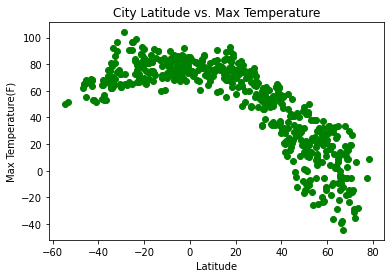

In [7]:
clean_city_data = cities_weather

x_values = clean_city_data["Lat"]
y_values = clean_city_data["Max Temp"]
#date = today()

# Plot
plt.scatter(x_values,y_values, color='green')
plt.title(f'City Latitude vs. Max Temperature')
plt.ylabel('Max Temperature(F)')
plt.xlabel('Latitude')

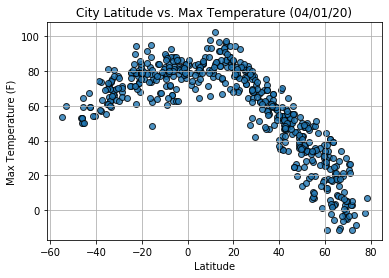

In [10]:
#Preserving Ouput

## Latitude vs. Humidity Plot

Text(0.5, 0, 'Latitude')

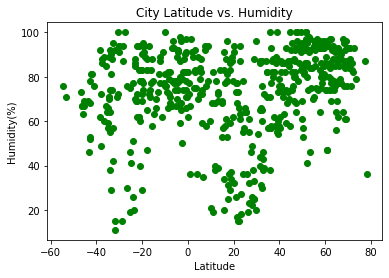

In [8]:
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Humidity"]

# Plot
plt.scatter(x_values,y_values,color='green')
plt.title(f'City Latitude vs. Humidity')
plt.ylabel('Humidity(%)')
plt.xlabel('Latitude')

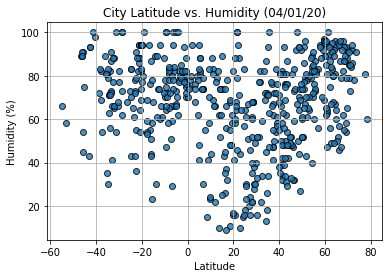

In [11]:
#Preserving Output

## Latitude vs. Cloudiness Plot

Text(0.5, 0, 'Latitude')

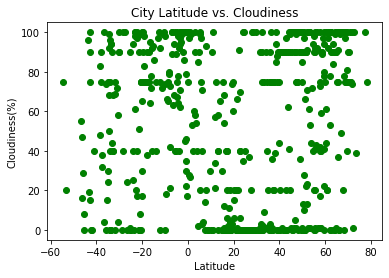

In [9]:
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Cloudiness"]

# Plot
plt.scatter(x_values,y_values, color='green')
plt.title(f'City Latitude vs. Cloudiness')
plt.ylabel('Cloudiness(%)')
plt.xlabel('Latitude')

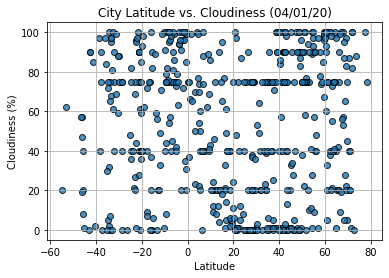

In [12]:
#Preserving Output

## Latitude vs. Wind Speed Plot

Text(0.5, 0, 'Latitude')

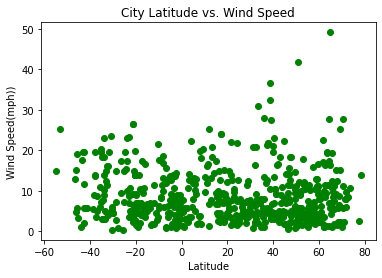

In [10]:
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Wind Speed"]

# Plot
plt.scatter(x_values,y_values, color='green')
plt.title(f'City Latitude vs. Wind Speed')
plt.ylabel('Wind Speed(mph))')
plt.xlabel('Latitude')

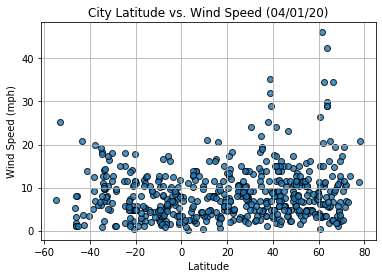

In [13]:
#Preserving Output

## Linear Regression

In [37]:
northern_hemi_df = clean_city_data.loc[clean_city_data["Lat"] > 0]

southern_hemi_df = clean_city_data.loc[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8681401111838538


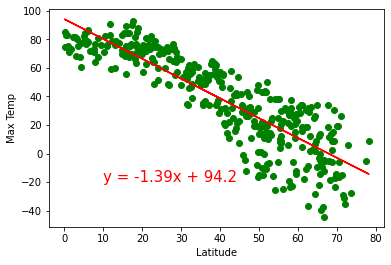

In [75]:
x_values = northern_hemi_df["Lat"]
x_values = x_values.astype('float32')
y_values = northern_hemi_df["Max Temp"]
y_values = y_values.astype('float32')

# Standard regression programming. X and Y 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values, color = 'green')
plt.plot(x_values,regress_values,"r-")
# Format
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.ylabel('Max Temp')
plt.xlabel('Latitude')

print(f"The r-value is: {rvalue}")

The r-value is: 0.46937863826630627


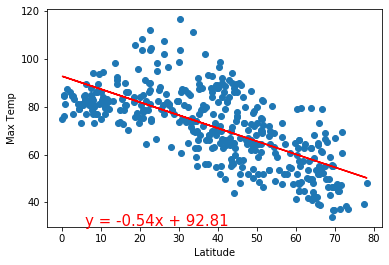

In [25]:
#Preserving Output

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5077646107523085


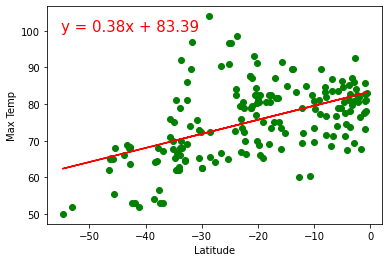

In [59]:
x_values = southern_hemi_df["Lat"]
x_values = x_values.astype('float32')
y_values = southern_hemi_df["Max Temp"]
y_values = y_values.astype('float32')

# Standard regression programming. X and Y 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values, color='green')
plt.plot(x_values,regress_values,"r-")
# Format
plt.annotate(line_eq,(-55,100),fontsize=15,color="red")
plt.ylabel('Max Temp')
plt.xlabel('Latitude')

print(f"The r-value is: {rvalue}")

The r-value is: 0.6082708688906918


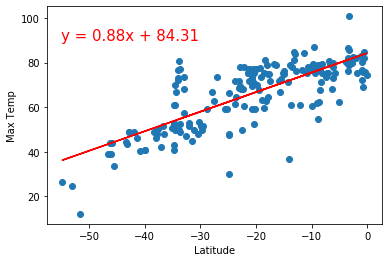

In [26]:
#Preserving Output

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3869294182937978


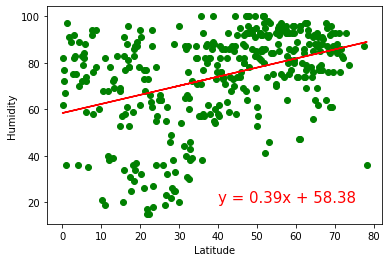

In [76]:
x_values = northern_hemi_df["Lat"]
x_values = x_values.astype('float32')
y_values = northern_hemi_df["Humidity"]
y_values = y_values.astype('float32')

# Standard regression programming. X and Y 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values, color='green')
plt.plot(x_values,regress_values,"r-")
# Format
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.ylabel('Humidity')
plt.xlabel('Latitude')

print(f"The r-value is: {rvalue}")

The r-value is: 0.000543987878808455


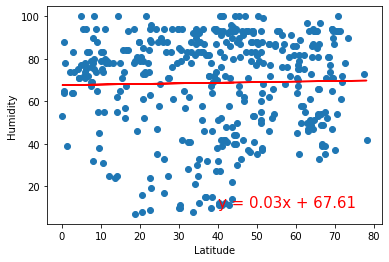

In [27]:
#Preserving Output

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.23118703796966744


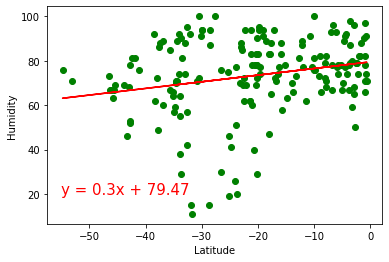

In [77]:
x_values = southern_hemi_df["Lat"]
x_values = x_values.astype('float32')
y_values = southern_hemi_df["Humidity"]
y_values = y_values.astype('float32')

# Standard regression programming. X and Y 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values, color='green')
plt.plot(x_values,regress_values,"r-")
# Format
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.ylabel('Humidity')
plt.xlabel('Latitude')

print(f"The r-value is: {rvalue}")

The r-value is: 0.014985174297345524


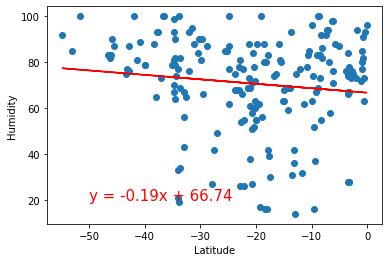

In [28]:
#Preserving Output

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.3163844698058709


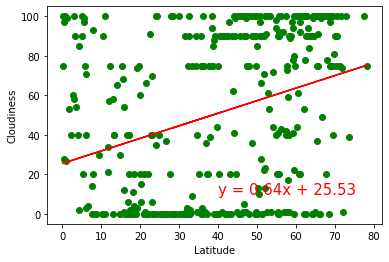

In [78]:
x_values = northern_hemi_df["Lat"]
x_values = x_values.astype('float32')
y_values = northern_hemi_df["Cloudiness"]
y_values = y_values.astype('float32')

# Standard regression programming. X and Y 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values, color='green')
plt.plot(x_values,regress_values,"r-")
# Format
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')

print(f"The r-value is: {rvalue}")

The r-value is: 0.0020898727664228514


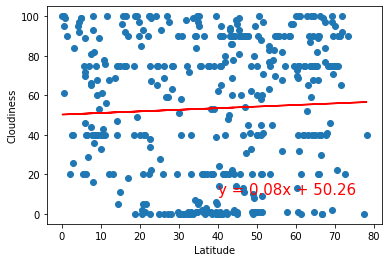

In [29]:
#Preserving Output

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.3141078653456818


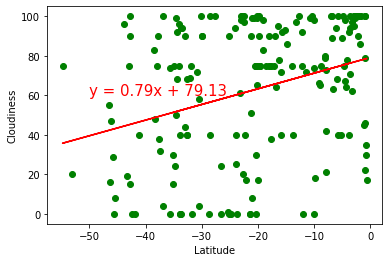

In [79]:
x_values = southern_hemi_df["Lat"]
x_values = x_values.astype('float32')
y_values = southern_hemi_df["Cloudiness"]
y_values = y_values.astype('float32')

# Standard regression programming. X and Y 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values, color='green')
plt.plot(x_values,regress_values,"r-")
# Format
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')

print(f"The r-value is: {rvalue}")

The r-value is: 0.0035263772085582894


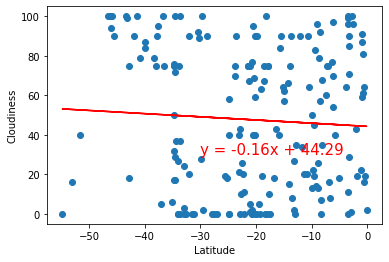

In [30]:
#Preserving Output

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.0172632609006346


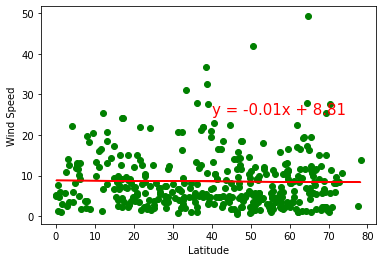

In [80]:
x_values = northern_hemi_df["Lat"]
x_values = x_values.astype('float32')
y_values = northern_hemi_df["Wind Speed"]
y_values = y_values.astype('float32')

# Standard regression programming. X and Y 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values, color='green')
plt.plot(x_values,regress_values,"r-")
# Format
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')

print(f"The r-value is: {rvalue}")

The r-value is: 0.04019723576144484


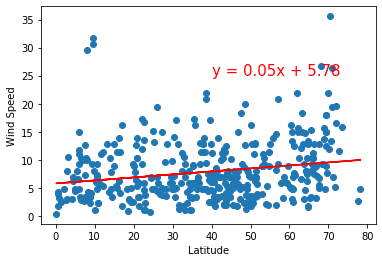

In [31]:
#Preserving Output

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.2401118905706294


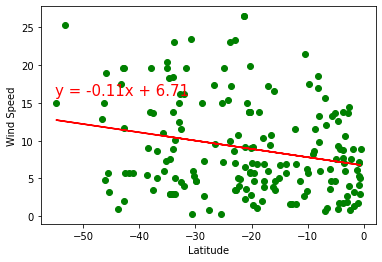

In [81]:
x_values = southern_hemi_df["Lat"]
x_values = x_values.astype('float32')
y_values = southern_hemi_df["Wind Speed"]
y_values = y_values.astype('float32')

# Standard regression programming. X and Y 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values, color='green')
plt.plot(x_values,regress_values,"r-")
# Format
plt.annotate(line_eq,(-55,16),fontsize=15,color="red")
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')

print(f"The r-value is: {rvalue}")

The r-value is: 0.017128274759839232


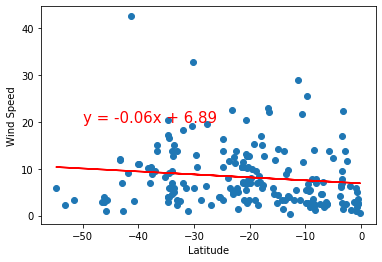

In [32]:
#Preserving Output